## Linear regression workbook

This workbook will walk you through a linear regression example. It will provide familiarity with Jupyter Notebook and Python.  Please print (to pdf) a completed version of this workbook for submission with HW #1.

ECE C147/C247, Winter Quarter 2023, Prof. J.C. Kao, TAs: T.M, P.L, R.G, K.K, N.V, S.R, S.P, M.E

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

#allows matlab plots to be generated in line
%matplotlib inline 

### Data generation

For any example, we first have to generate some appropriate data to use. The following cell generates data according to the model: $y = x - 2x^2 + x^3 + \epsilon$

Text(0, 0.5, '$y$')

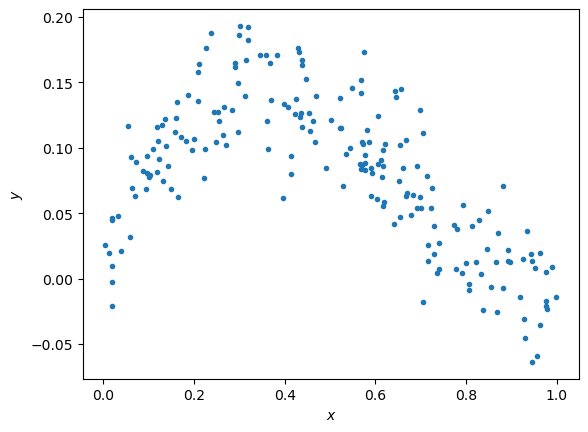

In [2]:
np.random.seed(0)  # Sets the random seed.
num_train = 200     # Number of training data points

# Generate the training data
x = np.random.uniform(low=0, high=1, size=(num_train,))
y = x - 2*x**2 + x**3 + np.random.normal(loc=0, scale=0.03, size=(num_train,))
f = plt.figure()
ax = f.gca()
ax.plot(x, y, '.')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

### QUESTIONS:

Write your answers in the markdown cell below this one:

(1) What is the generating distribution of $x$?

(2) What is the distribution of the additive noise $\epsilon$?

### ANSWERS:

(1) Uniform distribution from 0 to 1.

(2) Gaussian distribution with mean = 0 and standard deviation = 0.03.

### Fitting data to the model (5 points)

Here, we'll do linear regression to fit the parameters of a model $y = ax + b$.

In [3]:
# xhat = (x, 1)
xhat = np.vstack((x, np.ones_like(x)))

# ==================== #
# START YOUR CODE HERE #
# ==================== #
# GOAL: create a variable theta; theta is a numpy array whose elements are [a, b]

#theta = np.zeros(2) # please modify this line
theta = np.linalg.inv(xhat.dot(xhat.T)).dot(xhat).dot(y)

# ================== #
# END YOUR CODE HERE #
# ================== #

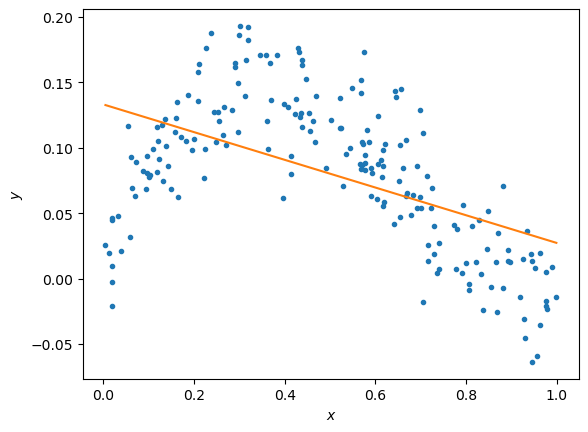

In [4]:
# Plot the data and your model fit.
f = plt.figure()
ax = f.gca()
ax.plot(x, y, '.')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

# Plot the regression line
xs = np.linspace(min(x), max(x),50)
xs = np.vstack((xs, np.ones_like(xs)))
plt.plot(xs[0,:], theta.dot(xs))

### QUESTIONS

(1) Does the linear model under- or overfit the data?

(2) How to change the model to improve the fitting?

### ANSWERS

(1) The linear model underfit the data.

(2) We can change the model to polynomial models with higher orders.

### Fitting data to the model (5 points)

Here, we'll now do regression to polynomial models of orders 1 to 5.  Note, the order 1 model is the linear model you prior fit.

In [5]:

N = 5
xhats = []
thetas = []

# ==================== #
# START YOUR CODE HERE #
# ==================== #

# GOAL: create a variable thetas.
# thetas is a list, where theta[i] are the model parameters for the polynomial fit of order i+1.
#   i.e., thetas[0] is equivalent to theta above.
#   i.e., thetas[1] should be a length 3 np.array with the coefficients of the x^2, x, and 1 respectively.
#   ... etc.

for index in range(5):
    xhats_index = np.ones_like(x)
    for count in range(index+1):
        xhats_index = np.vstack((x**(count+1),xhats_index))
    
    theta_index = np.linalg.inv(xhats_index.dot(xhats_index.T)).dot(xhats_index).dot(y)
    xhats.append(xhats_index)
    thetas.append(theta_index)
    

    

# ================== #
# END YOUR CODE HERE #
# ================== #

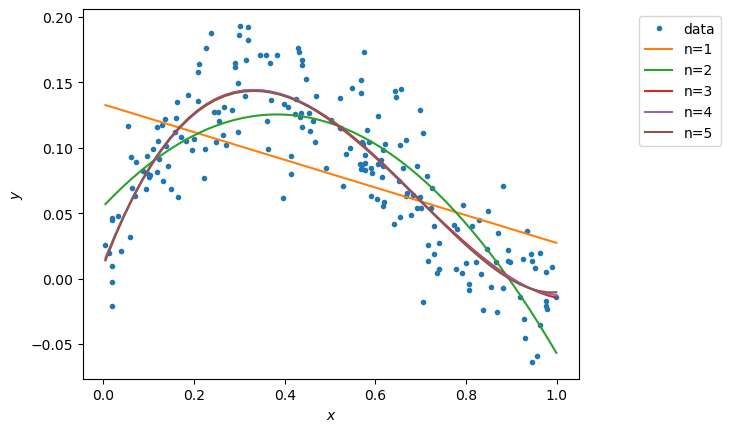

In [6]:
# Plot the data
f = plt.figure()
ax = f.gca()
ax.plot(x, y, '.')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

# Plot the regression lines
plot_xs = []
for i in np.arange(N):
    if i == 0:
        plot_x = np.vstack((np.linspace(min(x), max(x),50), np.ones(50)))
    else:
        plot_x = np.vstack((plot_x[-2]**(i+1), plot_x))                              
    plot_xs.append(plot_x)

for i in np.arange(N):
    ax.plot(plot_xs[i][-2,:], thetas[i].dot(plot_xs[i]))

labels = ['data']
[labels.append('n={}'.format(i+1)) for i in np.arange(N)]
bbox_to_anchor=(1.3, 1)
lgd = ax.legend(labels, bbox_to_anchor=bbox_to_anchor)

### Calculating the training error (5 points)

Here, we'll now calculate the training error of polynomial models of orders 1 to 5.

In [7]:
training_errors = []

# ==================== #
# START YOUR CODE HERE #
# ==================== #

# GOAL: create a variable training_errors, a list of 5 elements,
# where training_errors[i] are the training loss for the polynomial fit of order i+1.
for index in range(5):
    loss = 0.5*np.sum((y-xhats[index].T.dot(thetas[index]))**2)
    training_errors.append(loss)
# ================== #
# END YOUR CODE HERE #
# ================== #

print ('Training errors are: \n', training_errors)

Training errors are: 
 [0.23799610883627012, 0.1092492220926853, 0.08169603801105371, 0.08165353735296978, 0.08161479195525292]


### QUESTIONS

(1) What polynomial has the best training error?

(2) Why is this expected?

### ANSWERS

(1) The polynomial with order 5 has the best training error.

(2) With the order increasing, the model becomes more complex and can fit the data more precisely, which will decrease the training error .

### Generating new samples and testing error (5 points)

Here, we'll now generate new samples and calculate testing error of polynomial models of orders 1 to 5.

Text(0, 0.5, '$y$')

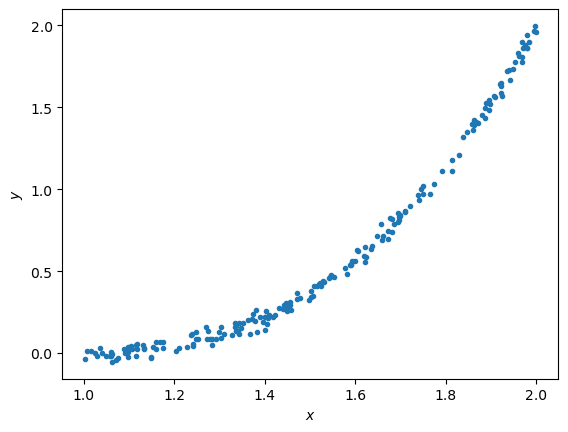

In [8]:
x = np.random.uniform(low=1, high=2, size=(num_train,))
y = x - 2*x**2 + x**3 + np.random.normal(loc=0, scale=0.03, size=(num_train,))
f = plt.figure()
ax = f.gca()
ax.plot(x, y, '.')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

In [9]:
xhats = []
for i in np.arange(N):
    if i == 0:
        xhat = np.vstack((x, np.ones_like(x)))
        plot_x = np.vstack((np.linspace(min(x), max(x),50), np.ones(50)))
    else:
        xhat = np.vstack((x**(i+1), xhat))
        plot_x = np.vstack((plot_x[-2]**(i+1), plot_x))
                              
    xhats.append(xhat)

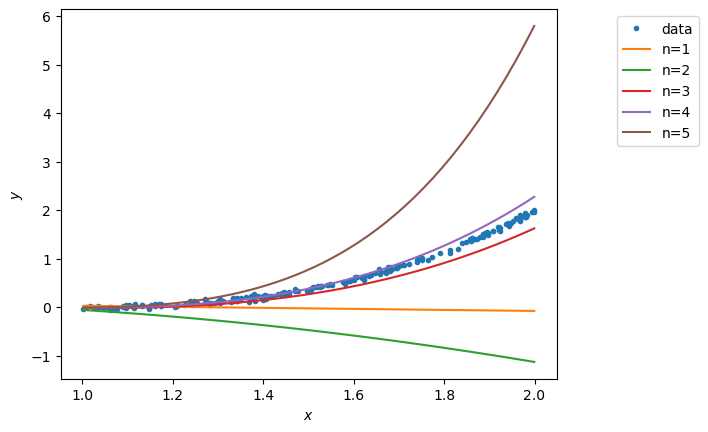

In [10]:
# Plot the data
f = plt.figure()
ax = f.gca()
ax.plot(x, y, '.')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

# Plot the regression lines
plot_xs = []
for i in np.arange(N):
    if i == 0:
        plot_x = np.vstack((np.linspace(min(x), max(x),50), np.ones(50)))
    else:
        plot_x = np.vstack((plot_x[-2]**(i+1), plot_x))                              
    plot_xs.append(plot_x)

for i in np.arange(N):
    ax.plot(plot_xs[i][-2,:], thetas[i].dot(plot_xs[i]))

labels = ['data']
[labels.append('n={}'.format(i+1)) for i in np.arange(N)]
bbox_to_anchor=(1.3, 1)
lgd = ax.legend(labels, bbox_to_anchor=bbox_to_anchor)

In [11]:
testing_errors = []

# ==================== #
# START YOUR CODE HERE #
# ==================== #

# GOAL: create a variable testing_errors, a list of 5 elements,
# where testing_errors[i] are the testing loss for the polynomial fit of order i+1.
for index in range(5):
    loss = 0.5*np.sum((y-xhats[index].T.dot(thetas[index]))**2)
    testing_errors.append(loss)

# ================== #
# END YOUR CODE HERE #
# ================== #

print ('Testing errors are: \n', testing_errors)

Testing errors are: 
 [80.86165184550586, 213.19192445058087, 3.125697108274283, 1.1870765189182289, 214.9102183511946]


### QUESTIONS

(1) What polynomial has the best testing error?

(2) Why polynomial models of orders 5 does not generalize well?

### ANSWERS

(1) The polynomial of orders 4 has the best testing error.

(2) The polynomial of orders 5 overfits the data. The model with higher orders has better ability to fit the given data, while the data may contain noise and errors. This results the overfitting problem and the model is not general for the whole data, which makes the bad testing performance.